In [3]:
import pandas as pd
data = pd.read_excel("happiness_world.xlsx")

In [4]:
# Calling for our dataset
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [7]:
# Checking for duplicates
data.duplicated().sum()# We conclude by saying that we have ino duplicated values in our dataset.

np.int64(0)

In [5]:
#Checking if our dataaset has any missing values
data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Therefore, we conclude that our dataset has no any missing values.

In [6]:
# checking for datatypes
data.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

# Explain the probability distribution of any one quantitative variable. Include visuals.  

Using the Ladder score quantitative varaible,
- This a continous variable that shows how happiness scores are spread across different countries. It shows that the data in this variable is normally distributed.

In [8]:
# Importing the neccessary libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

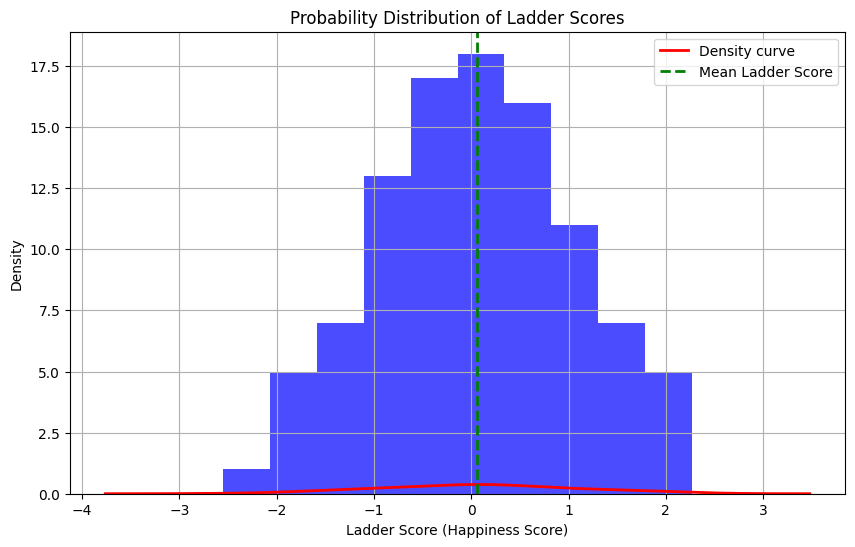

In [9]:
np.random.seed(0)
#We generate random data 
Ladder_score =np.random.normal(loc=0, scale=1, size=100)
plt.figure(figsize=(10,6))
plt.hist(Ladder_score, bins=10, color='blue', alpha=0.7)
sns.kdeplot(Ladder_score, color='red',linewidth=2,label='Density curve')
plt.axvline(np.mean(Ladder_score), color='green', linestyle='dashed', linewidth=2, label="Mean Ladder Score")

plt.xlabel("Ladder Score (Happiness Score)")
plt.ylabel("Density")
plt.title("Probability Distribution of Ladder Scores")
plt.legend()
plt.grid()

# Are there any outliers in the variable “Generosity” and if so, how many are they? 

In [20]:
#We find out the information about the "Generosity" column
data["Generosity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Generosity
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [19]:
np.random.seed(99)
#We generate random data
Generosity = np.random.normal(loc=0, scale=1, size=100)
data = pd.DataFrame({'Generosity': Generosity})
# We calculate the Q1,Q3 and the interquartile range
Q1 = data["Generosity"].quantile(0.25)
Q3 = data["Generosity"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = data[(data["Generosity"] < lower_bound) | (data["Generosity"] > upper_bound)]

# Print results
print(f"Number of outliers: {outliers.shape[0]}")
print("Outlier values:\n", outliers)

Number of outliers: 2
Outlier values:
     Generosity
57    2.875360
84   -2.613661


Therefore, we conclude by saying that our Generosity variable has outliers

# Explain the relationship between the variables “Regional indicator” and “Perceptions of corruption.” Include visuals and statistics.

Summary Statistics by Region:
                                        mean  median       std  count
Regional indicator                                                   
Central and Eastern Europe          0.850529  0.8760  0.102474     17
Commonwealth of Independent States  0.725083  0.6940  0.164244     12
East Asia                           0.683333  0.7240  0.154219      6
Latin America and Caribbean         0.792600  0.8180  0.080603     20
Middle East and North Africa        0.762235  0.7530  0.080509     17
North America and ANZ               0.449250  0.4285  0.188020      4
South Asia                          0.797429  0.7870  0.081672      7
Southeast Asia                      0.709111  0.7960  0.250301      9
Sub-Saharan Africa                  0.765944  0.7975  0.127012     36
Western Europe                      0.523095  0.4810  0.232315     21


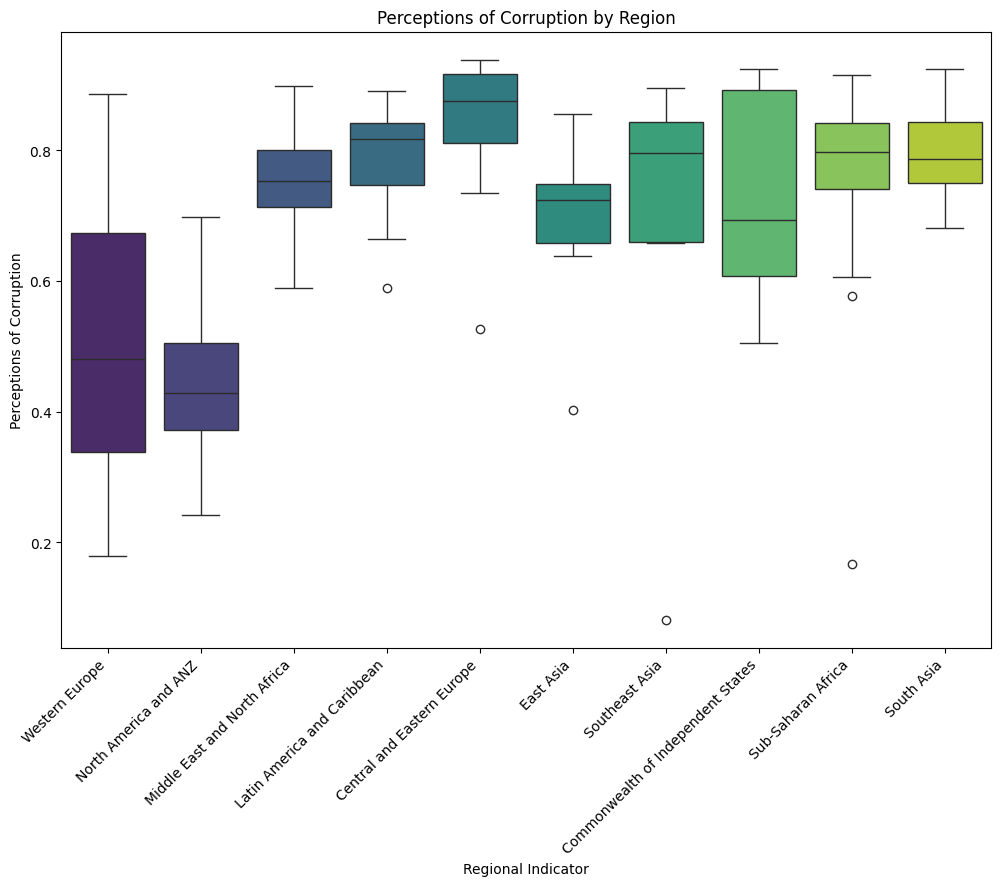


ANOVA Results:
F-statistic: 8.2245
P-value: 0.0000
There is a statistically significant difference in perceptions of corruption across regions.


In [32]:
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel('happiness_world.xlsx')

# Group by 'Regional indicator' and calculate summary statistics for 'Perceptions of corruption'
grouped_stats = data.groupby('Regional indicator')['Perceptions of corruption'].agg(['mean', 'median', 'std', 'count'])
print("Summary Statistics by Region:")
print(grouped_stats)

# Visualize the relationship using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regional indicator', y='Perceptions of corruption', data=data, palette='viridis')
plt.title('Perceptions of Corruption by Region')
plt.xlabel('Regional Indicator')
plt.ylabel('Perceptions of Corruption')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Perform ANOVA to test for significant differences between regions
regions = data['Regional indicator'].unique()
region_groups = [data[data['Regional indicator'] == region]['Perceptions of corruption'] for region in regions]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*region_groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in perceptions of corruption across regions.")
else:
    print("There is no statistically significant difference in perceptions of corruption across regions.")


 

# The mean global variable “Perceptions of corruption” as of 2024 is 0.43. A null hypothesis is postulated that the “Perceptions of corruptions” for Uganda the provided dataset is not different from the global average of 2024. Is this null hypothesis true?